In [1]:
import pandas as pd
import numpy as np
import glob
import re

In [28]:
master = []
for files in glob.glob("C:/Users/15099/Desktop/Canopy_data/*.csv.gz"):
    ## READ IN CSVs 
    data_set = pd.read_csv(files)
    data_set = data_set.dropna(axis=0)
    ## ADD DATES COLUMN
    date = re.findall("\d+", files)
    date = date[2] + "_" + date[3]
    data_set["date"] = date
    ## CONCATENATE FILE TO MASTER
    master.append(data_set)
master = pd.concat(master).drop_duplicates().reset_index(drop=True)
master['r_record'] = master['r_record']/256
master['g_record'] = master['g_record']/256
master['b_record'] = master['b_record']/256

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
def add_summary_statistics(subset, name, day, plot_ID):
    r = subset['r_record'].mean()
    g = subset['g_record'].mean()
    b = subset['b_record'].mean()

    r_std = subset['r_record'].std()
    g_std = subset['g_record'].std()
    b_std = subset['b_record'].std()
    
    plot_date_summary = {'ID': name, 'Date': day, "plot_ID": plot_ID, 'r_mean': r, 'g_mean': g, 'b_mean': b, 'r_stdev': r_std, 'g_stdev': g_std, 'b_stdev': b_std}
    return pd.DataFrame.from_records([plot_date_summary])
        

In [ ]:
## CATEGORIZE BY PLOT & DATE
plot_name = master['shpID'].unique()
date = master['date'].unique()
## CREATE A NEW DATAFRAME WITH STATISTICS FOR EACH PLOT AT EACH TIME POINT
## Note: Takes a long time
summary = pd.DataFrame()
i = 0
for day in date: 
    print(day, "running")
    i+=1
    date_subset = master.loc[master['date']==day]
    for plot in plot_name:
        subset = date_subset.loc[date_subset['shpID']==plot]
        name = day + '_' + plot
        row = add_summary_statistics(subset, name, day, plot)
        summary = pd.concat([summary, row], ignore_index=True)
summary.to_csv("RGB_summary_statistics.csv", sep=',')        

In [4]:
summary = pd.read_csv("RGB_summary_statistics.csv", index_col=0)
date = summary['Date'].unique()
plot_name = summary['ID'].unique()

In [20]:
## PC ANALYSIS, INFORMATION AND STEPS COPIED FROM "https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python"

from sklearn.preprocessing import StandardScaler
features = np.array(summary.columns)
features = np.delete(features, [0,1,2,3,4,6,7,8])
x = summary.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_color= pd.DataFrame(x,columns=feat_cols)

from sklearn.decomposition import PCA
pca_color = PCA(n_components=2)
principalComponents_color = pca_color.fit_transform(x)

In [21]:
features

array(['b_mean', 'GR_difference', 'total', 'r_ratio', 'g_ratio',
       'b_ratio', 'r+g', 'r+g+b'], dtype=object)

In [22]:
principal_color_DF = pd.DataFrame(data = principalComponents_color, columns = ['PC1', 'PC2'])

In [23]:
print('Explained variation per principal component: {}'.format(pca_color.explained_variance_ratio_))
#PC1 = 59% and PC2 = 34% ... 0.0646869599

Explained variation per principal component: [0.5876645 0.2676644]


<Figure size 432x288 with 0 Axes>

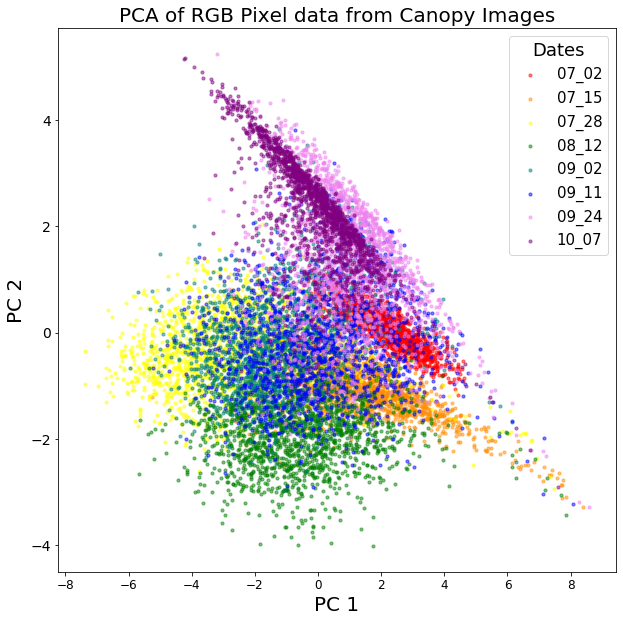

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC 1',fontsize=20)
plt.ylabel('PC 2',fontsize=20)
plt.title("PCA of RGB Pixel data from Canopy Images",fontsize=20)
# seperate by
targets = date
colors = ['r', 'darkorange', 'yellow', 'green', 'teal', 'blue', 'violet', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = summary['Date'] == target
    plt.scatter(principal_color_DF.loc[indicesToKeep, 'PC1'], principal_color_DF.loc[indicesToKeep, 'PC2'],color=color, s = 10, alpha=0.5)
plt.legend(targets,prop={'size': 15}, title='Dates', title_fontsize=18)

C:\Users\15099\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\15099\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2477: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


<Figure size 432x288 with 0 Axes>

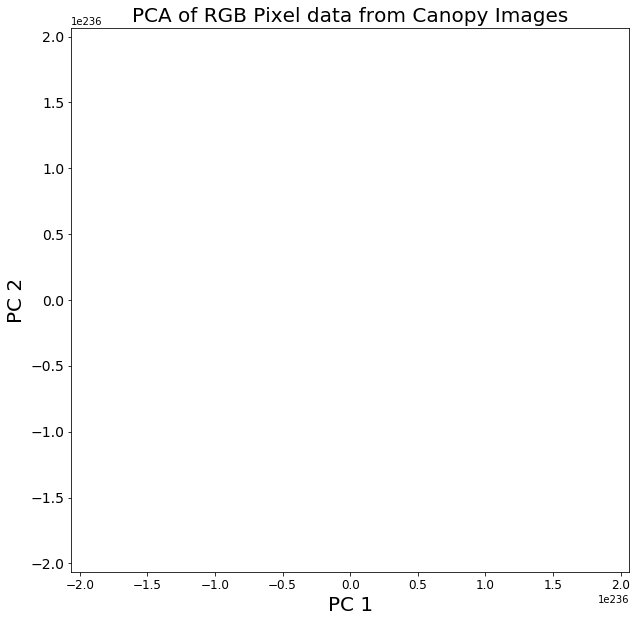

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC 1',fontsize=20)
plt.ylabel('PC 2',fontsize=20)
plt.title("PCA of RGB Pixel data from Canopy Images",fontsize=20)
# seperate by
targets = plot_name
#colors = ['r', 'darkorange', 'yellow', 'green', 'teal', 'blue', 'violet', 'purple']
for target in targets:
    indicesToKeep = summary['plot_ID'] == target
    plt.scatter(principal_color_DF.loc[indicesToKeep, 'PC1'], principal_color_DF.loc[indicesToKeep, 'PC2'], s = 10, alpha=0.5)
#plt.legend(targets,prop={'size': 15}, title='Dates', title_fontsize=18)

In [37]:
summary.head()


,ID,Date,plot_ID,r_mean,g_mean,b_mean,r_stdev,g_stdev,b_stdev,GR_difference,total,r_ratio,g_ratio,b_ratio,r+g,r+g+b
0,07_02_EL19_fill-1-1,07_02,EL19_fill-1-1,160.590715,155.521686,151.288332,19.273697,20.302879,20.288053,-5.069029,467.400733,0.343583,0.332737,0.323680,316.112401,467.400733
1,07_02_EL19_fill-1-2,07_02,EL19_fill-1-2,156.650914,151.900441,145.929427,20.488742,21.545668,21.357967,-4.750473,454.480781,0.344681,0.334229,0.321090,308.551355,454.480781
2,07_02_EL19_fill-1-3,07_02,EL19_fill-1-3,152.422819,147.806488,142.227069,23.640380,23.067127,23.456920,-4.616331,442.456376,0.344492,0.334059,0.321449,300.229306,442.456376
3,07_02_EL19_fill-1-4,07_02,EL19_fill-1-4,150.998456,147.582604,141.090067,26.548995,24.599579,25.750379,-3.415852,439.671127,0.343435,0.335666,0.320899,298.581060,439.671127
4,07_02_EL19_fill-1-5,07_02,EL19_fill-1-5,138.423688,139.117959,129.995667,30.950728,25.828396,28.755153,0.694271,407.537313,0.339659,0.341363,0.318979,277.541647,407.537313


In [14]:
summary['GR_difference'] = summary['g_mean'] - summary['r_mean']

In [15]:
summary['total'] = summary['r_mean'] + summary['g_mean'] + summary['b_mean']
summary['r_ratio'] = summary['r_mean'] / summary['total']
summary['g_ratio'] = summary['g_mean'] / summary['total']
summary['b_ratio'] = summary['b_mean'] / summary['total']

In [16]:
summary['r+g'] = summary['r_mean'] + summary['g_mean']
summary['r+g+b'] = summary['r_mean'] + summary['g_mean'] + summary['b_mean']

In [17]:
df_2 = summary.sort_values('r_mean')
df_2 = summary.sort_values('r+g')
df_2 = summary.sort_values('r+g+b')

In [94]:
df_2.head()

,ID,Date,plot_ID,r_mean,g_mean,b_mean,r_stdev,g_stdev,b_stdev,GR_difference,total,r_ratio,g_ratio,b_ratio,r+g,r+g+b
12798,10_07_EL19_6279-26-7,10_07,EL19_6279-26-7,53.020264,50.539114,52.169651,32.555166,31.258042,29.743608,-2.481150,155.729029,0.340465,0.324532,0.335003,103.559378,155.729029
13237,10_07_EL19_6698-36-36,10_07,EL19_6698-36-36,54.312639,51.279933,51.989468,36.045249,35.276812,33.461005,-3.032705,157.582040,0.344663,0.325417,0.329920,105.592572,157.582040
13051,10_07_EL19_6520-32-14,10_07,EL19_6520-32-14,57.555751,54.392606,55.096831,40.456212,39.223679,35.275270,-3.163146,167.045188,0.344552,0.325616,0.329832,111.948357,167.045188
12726,10_07_EL19_6211-24-17,10_07,EL19_6211-24-17,59.443257,56.112468,57.905344,41.258023,40.579522,38.635434,-3.330789,173.461069,0.342689,0.323487,0.333823,115.555725,173.461069
4394,07_28_EL19_6280-26-8,07_28,EL19_6280-26-8,49.733868,75.936235,49.148912,26.798968,33.546761,26.497070,26.202367,174.819015,0.284488,0.434371,0.281142,125.670103,174.819015


<BarContainer object of 13448 artists>

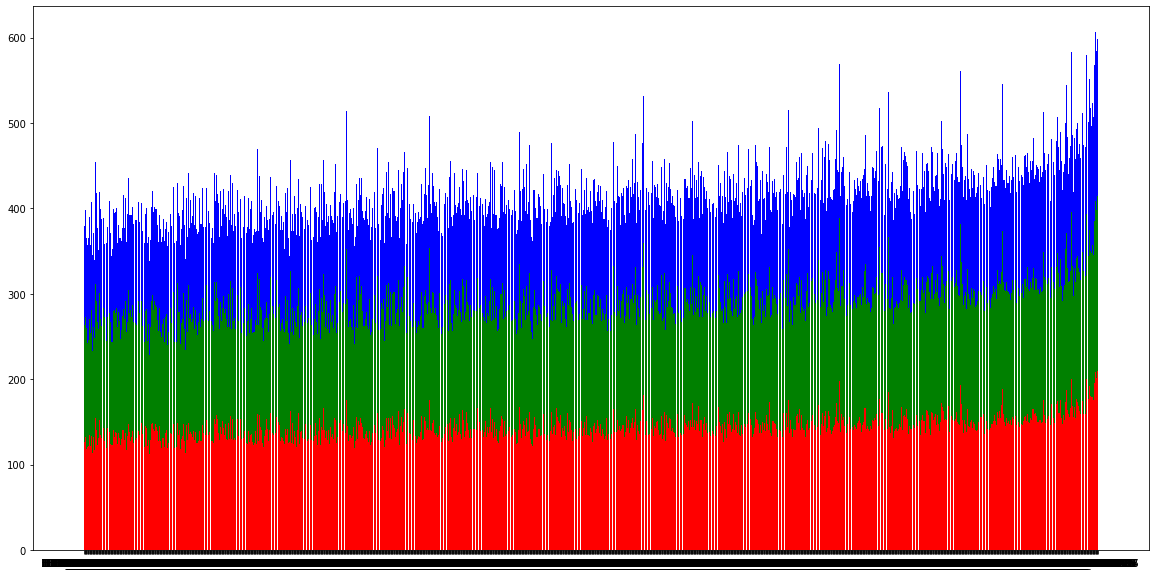

In [95]:
plt.figure(figsize=(20,10))
plt.bar(x=df_2['plot_ID'], height=df_2['r+g+b'], width=0.9, color='blue')
plt.bar(x=df_2['plot_ID'], height=df_2['r+g'], width=0.9, color='green')
plt.bar(x=df_2['plot_ID'], height=df_2['r_mean'], width=0.9, color='red')

<BarContainer object of 13448 artists>

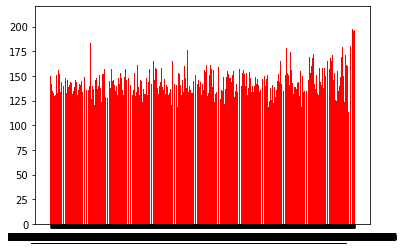

In [84]:
plt.bar(x=df_2['plot_ID'], height=df_2['r_mean'], width=0.9, color='red')

(array([  20.,  140.,  683., 1881., 3599., 4527., 2098.,  414.,   64.,
          22.]),
 array([ 50.53911404,  65.99399932,  81.4488846 ,  96.90376987,
        112.35865515, 127.81354042, 143.2684257 , 158.72331098,
        174.17819625, 189.63308153, 205.0879668 ]),
 <a list of 10 Patch objects>)

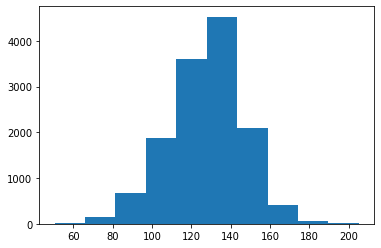

In [88]:
plt.hist(x=df_2['g_mean'])

In [ ]:
summary.head